In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, bins=64):
    perturb = np.random.normal(
        size=(num_samples, base_poly.shape[0], 2),
        scale=stdev
    ).view(np.complex128)[:, :, 0]
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
    
    max_radii = np.absolute(roots).max(axis=1)
    min_radii = np.absolute(roots).min(axis=1)
    
    plt.figure(figsize=(6,4))
    plt.hist(
        max_radii,
        bins=bins,
        range=(np.percentile(max_radii, 1) - 0.1, np.percentile(max_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("magnitude of max root")
    plt.ylabel("normalized proportion of max roots with magnitude")
    plt.xlim(0, 4)
    plt.title(f"Polynomial of degree n={base_poly.shape[0] - 1}")

CPU times: user 611 ms, sys: 33 ms, total: 644 ms
Wall time: 727 ms


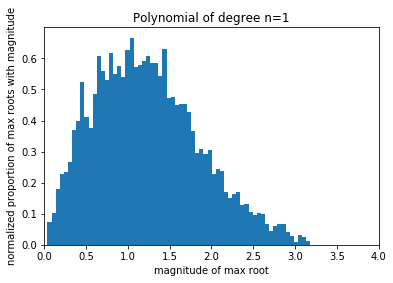

In [30]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 1 * [0], dtype=np.complex128),
    num_samples=5000
)

CPU times: user 563 ms, sys: 16 ms, total: 578 ms
Wall time: 600 ms


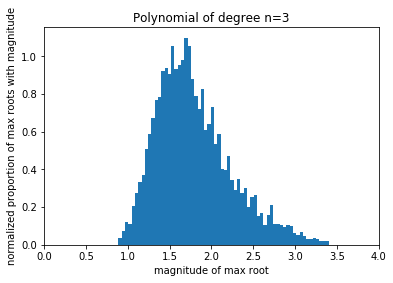

In [31]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 3 * [0], dtype=np.complex128),
    num_samples=5000
)

CPU times: user 1.03 s, sys: 20 ms, total: 1.05 s
Wall time: 1.21 s


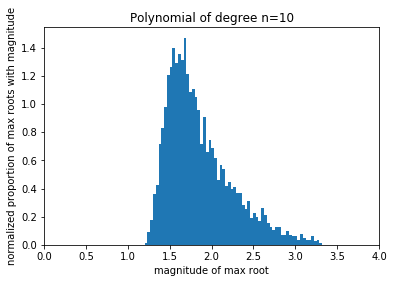

In [32]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=5000
)